In [1]:
# import
import numpy as np
import cv2 as cv
import va

#### Mia soluzione 
Revisione della soluzione proposta in sede d'esame

Originale,Media,Differenza,Soluzione
,,,

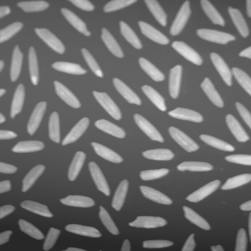
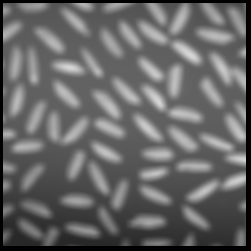
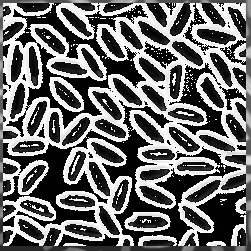
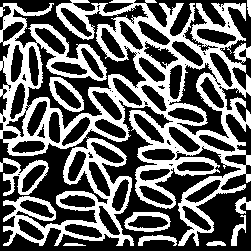

In [38]:
img = cv.imread('Immagini/rice.png', cv.IMREAD_GRAYSCALE)
h, w = img.shape
img2 = np.zeros((h,w),dtype=np.uint8)

for i in range(3,h-5):
    for j in range(3,w-5):
        img2[i,j] = img[i-3:i+5,j-3:j+5].mean()

Diff = abs(img-img2)
_, img3 = cv.threshold(Diff, 128, 255, cv.THRESH_BINARY)

n, cc, stats, _ = cv.connectedComponentsWithStats(img3)
for i in range(1, n):
    if stats[i][cv.CC_STAT_AREA] < 50 :
        img3[cc==i] = 0

va.show((img,"Originale"),(img2,"Media"),(Diff,"Differenza"),(img3,"Soluzione"))

#### Soluzione Proposta

alpha=0 beta=255


Originale,Media,Differenza,Soluzione
,,,

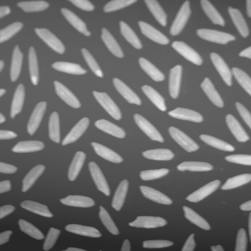
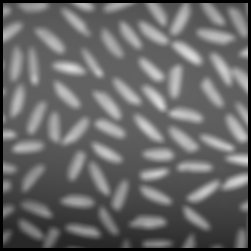
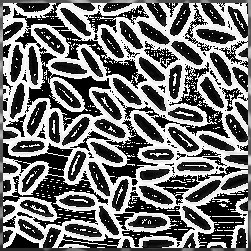
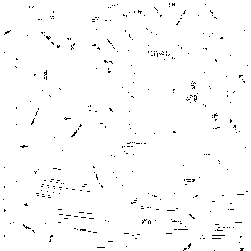

In [37]:
img = cv.imread('Immagini/rice.png', cv.IMREAD_GRAYSCALE)

avg_img = cv.boxFilter(img, -1, (7, 7))
avg_img[:3], avg_img[:,:3], avg_img[-3:], avg_img[:,-3:] = 0, 0, 0, 0

Diff = np.abs(img - avg_img)
# 
v_min, v_max = Diff.min(), Diff.max()
print(f"alpha={v_min} beta={v_max}")
if (v_max > v_min):
    Diff = (255 * (Diff.astype(float)-v_min)/(v_max-v_min)).astype(np.uint8)
    
_, bin_img = cv.threshold(Diff, 128, 255, cv.THRESH_BINARY)
n, cc, stats, _ = cv.connectedComponentsWithStats(bin_img)

toRemove = np.argwhere(stats[:, cv.CC_STAT_AREA] < 15)
img6 = np.where(np.isin(cc, toRemove), 0, 255).astype(np.uint8)

va.show((img,"Originale"),(avg_img,"Media"),(Diff,"Differenza"),(img6,"Soluzione"))